<a href="https://colab.research.google.com/github/meryreddoor/yogagame_/blob/master/Model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
from keras import backend as K
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display 
from PIL import Image
import h5py
import keras

Using TensorFlow backend.


In [2]:
data = pd.read_pickle("/content/drive/My Drive/w_arraydef.pkl")
data.head()

,pose,png,path,array
0,chaturanga dandasana,8820.png,../img/chaturanga dandasana/8820.png,"[[127, 127, 127, 129, 129, 129, 129, 129, 129,..."
1,chaturanga dandasana,1810.png,../img/chaturanga dandasana/1810.png,"[[253, 252, 254, 250, 248, 230, 135, 144, 121,..."
2,chaturanga dandasana,3020.png,../img/chaturanga dandasana/3020.png,"[[170, 176, 177, 177, 177, 179, 181, 182, 182,..."
3,chaturanga dandasana,610.png,../img/chaturanga dandasana/610.png,"[[108, 106, 102, 101, 107, 111, 117, 101, 11, ..."
4,chaturanga dandasana,4820.png,../img/chaturanga dandasana/4820.png,"[[184, 175, 175, 173, 164, 173, 186, 188, 186,..."


In [3]:
data['array']

0      [[127, 127, 127, 129, 129, 129, 129, 129, 129,...
1      [[253, 252, 254, 250, 248, 230, 135, 144, 121,...
2      [[170, 176, 177, 177, 177, 179, 181, 182, 182,...
3      [[108, 106, 102, 101, 107, 111, 117, 101, 11, ...
4      [[184, 175, 175, 173, 164, 173, 186, 188, 186,...
                             ...                        
891    [[214, 214, 214, 214, 214, 214, 214, 214, 214,...
892    [[185, 185, 186, 187, 188, 189, 192, 192, 193,...
893    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
894    [[112, 113, 119, 124, 122, 116, 113, 119, 124,...
895    [[218, 218, 224, 232, 240, 243, 237, 231, 226,...
Name: array, Length: 896, dtype: object

In [0]:
new_dummies = pd.get_dummies(data['pose'])

In [5]:
data_new = data.join(new_dummies)
data_new.head()

,pose,png,path,array,ardha matsyendrasana,chaturanga dandasana,garudasana,other
0,chaturanga dandasana,8820.png,../img/chaturanga dandasana/8820.png,"[[127, 127, 127, 129, 129, 129, 129, 129, 129,...",0,1,0,0
1,chaturanga dandasana,1810.png,../img/chaturanga dandasana/1810.png,"[[253, 252, 254, 250, 248, 230, 135, 144, 121,...",0,1,0,0
2,chaturanga dandasana,3020.png,../img/chaturanga dandasana/3020.png,"[[170, 176, 177, 177, 177, 179, 181, 182, 182,...",0,1,0,0
3,chaturanga dandasana,610.png,../img/chaturanga dandasana/610.png,"[[108, 106, 102, 101, 107, 111, 117, 101, 11, ...",0,1,0,0
4,chaturanga dandasana,4820.png,../img/chaturanga dandasana/4820.png,"[[184, 175, 175, 173, 164, 173, 186, 188, 186,...",0,1,0,0


In [6]:
data_new.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana',
       'chaturanga dandasana', 'garudasana ', 'other'],
      dtype='object')

In [7]:
data_new['gt'] = data_new[['ardha matsyendrasana','chaturanga dandasana','garudasana ','other']].apply(lambda x: pd.Series([x.values]), axis=1)
data_new.head()

,pose,png,path,array,ardha matsyendrasana,chaturanga dandasana,garudasana,other,gt
0,chaturanga dandasana,8820.png,../img/chaturanga dandasana/8820.png,"[[127, 127, 127, 129, 129, 129, 129, 129, 129,...",0,1,0,0,"[0, 1, 0, 0]"
1,chaturanga dandasana,1810.png,../img/chaturanga dandasana/1810.png,"[[253, 252, 254, 250, 248, 230, 135, 144, 121,...",0,1,0,0,"[0, 1, 0, 0]"
2,chaturanga dandasana,3020.png,../img/chaturanga dandasana/3020.png,"[[170, 176, 177, 177, 177, 179, 181, 182, 182,...",0,1,0,0,"[0, 1, 0, 0]"
3,chaturanga dandasana,610.png,../img/chaturanga dandasana/610.png,"[[108, 106, 102, 101, 107, 111, 117, 101, 11, ...",0,1,0,0,"[0, 1, 0, 0]"
4,chaturanga dandasana,4820.png,../img/chaturanga dandasana/4820.png,"[[184, 175, 175, 173, 164, 173, 186, 188, 186,...",0,1,0,0,"[0, 1, 0, 0]"


In [0]:
X = np.stack(data['array'])
X = X / 255.0
y = np.stack(data_new['gt'])

In [9]:
y.shape

(896, 4)

In [10]:
X.shape

(896, 224, 224)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
img_rows, img_cols = 224, 224

In [0]:
# para poner el canala que falta
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

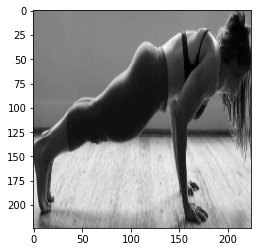

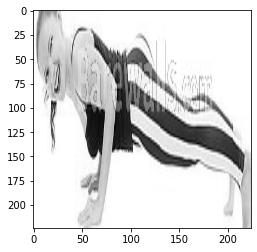

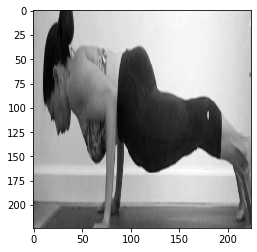

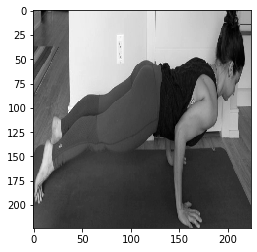

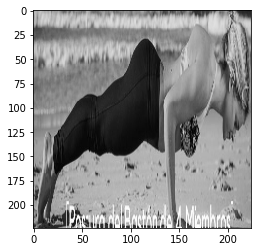

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
columns = 5
for i in range(columns):
    plt.figure()
    im = X[i]
    plt.imshow(im,cmap="gray")

In [0]:

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (224,224, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax')) # number of classes
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

'''# Data Augmentation
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen(X,target_size = (64, 64),batch_size = batch_size,class_mode = 'categorical')
test_set = test_datagen(y,target_size = (64, 64),batch_size = batch_size,class_mode = 'categorical')

classifier.fit_generator(training_set,
                         steps_per_epoch = 729 // batch_size, # number of training set images, 729
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 229 // batch_size) # number of test set images, 229
'''
batch_size = 32
classifier.fit(X_train,y_train,
               batch_size = batch_size,
               epochs = 15,
               verbose = 1,
               validation_data = (X_test,y_test))

classifier.save('my_model_multiclass10.h5') #save model 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 716 samples, validate on 180 samples
Epoch 1/15





716/716 [==============================] - 45s 63ms/step - loss: 10.5877 - acc: 0.2849 - val_loss: 1.3794 - val_acc: 0.2722
Epoch 2/15
716/716 [==============================] - 43s 61ms/step - loss: 1.5514 - acc: 0.3226 - val_loss: 1.3819 - val_acc: 0.2944
Epoch 3/15
716/716 [==============================] - 43s 60ms/step - loss: 1.3740 - acc: 0.2989 - val_loss: 1.3757 - val_acc: 0.2944
Epoch 4/15
716/716 [==============================] - 43s 60ms/step - loss: 1.3560 - acc: 0.2989 - val_loss: 1.3655 - val_acc: 0.3222
Epoch 5/15
716/716 [==============================] - 43s 60ms/step - loss: 1.1619 - acc: 0.5363 - val_loss: 0.8397 - val_acc: 0.7278
Epoch 6/15
716/716 [==============================] - 42s 59ms/step - loss: 0.6551 - acc: 0.7807 - val_loss: 0.5071 - val_acc: 0.8222
Epoch 7/15
716/716 [===========================

In [0]:
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


In [0]:
batch_size = 32
classifier.fit(X,y,
               batch_size = batch_size,
               epochs = 15,
               verbose = 1,
               validation_data = (X_test,y_test))


In [0]:
classifier.save('my_model_multiclass10.h5') #save model 